# <center> Introduction to Crowd Density Estimation </center>


## Team - 27:


1.   **Tanya Chhikara** - 01101172020 (B.Tech CSAI 3rd Year)
2.   **Kashika Akhouri** - 02401172020 (B.Tech CSAI 3rd Year)
3.   **Samya Jain** - 03501172020 (B.Tech CSAI 3rd Year)



# What is Crowd Density Estimation?
Crowd Counting is a technique to count or estimate the number of people in an image. For this, we create density plots for the images and this is what our model is based on. But before we more further, let's understand why Crowd Density Estimation is even essential.

# Why is Crowd Counting useful?
There are plenty of other scenarios where crowd counting algorithms are changing the way industries work:

*   Counting the number of people attending a sporting event
*   Estimating how many people attended an inauguration or a march (political rallies, perhaps)
*   Monitoring of high-traffic areas
*   Helping with staffing allocation and resource allotment

Now, let's dive deeper into understanding the basics of Crowd Density Estimation

# Introduction to Practical Implementation of Crowd Density Estimation
In this notebook, we will majorly cover the first step in the practical implementation. We will try to understand what our model will perform during its training. We will understand the basic steps using an example and analysing our dataset.

## Importing Libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat

#Image Proces
from scipy.ndimage import gaussian_filter

## Displaying Images in Notebook
To display images in Python notebook, we have defined a function imshow that takes title, image and size as arguments with a default value of 10. The function maintains the image by calculating the aspect ratio using height and width values and using them for figure size.

imshow function displays data as an image, i.e., on a 2D regular raster. The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image. When the image file is read with the OpenCV function imread(), the order of colors is BGR (blue, green, red). On the other hand, in Pillow, the order of colors is assumed to be RGB (red, green, blue). Therefore the attribute COLOR_BGR2RGB is used

In [ ]:
# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## Uploading the Dataset
The dataset used in this notebook and project is the Shanghai Tech Dataset. which contains 1198 annotated images, with a total of 330,165 people with centers of their heads annotated.
This dataset consists of two parts: there are 482 images in Part A which
are randomly crawled from the Internet, and 716 images in
Part B which are taken from the busy streets of metropolitan
areas in Shanghai.
Both
Part A and Part B are divided into training and testing: 300
images of Part A are used for training and the remaining
182 images for testing;, and 400 images of Part B are for
training and 316 for testing.

In [ ]:
# Uploading dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Example Images from the Dataset

In [ ]:
# Storing path of IMG_1.jpg from Part A train_data images into a variable called Example_Image_Path
Example_Image_Path = '/content/drive/MyDrive/Datasets/part_A/train_data/images/IMG_1.jpg'

In [ ]:
# Storing path of IMG_1.jpg from Part A test_data images into a variable called Example_Image_Path
Example_Test_Path = '/content/drive/MyDrive/Datasets/part_A/test_data/images/IMG_1.jpg'

### Displaying Images in Notebook

We have used OpenCV's imread() function to read the image whose path is stored in the variable Example_Image_path and Example_Test_Path respectively.
```
imread() - The function imdecode reads an image from the specified buffer in the memory.
```

The image is then displayed using the imshow function that has been defined above.

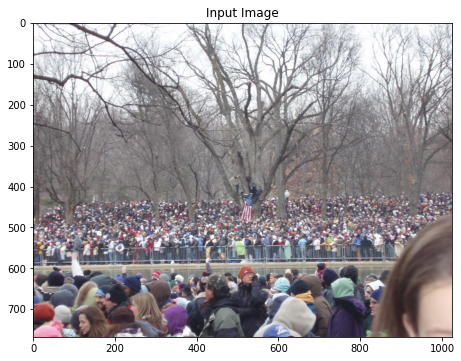

In [ ]:
# Displaying image from train_data
Example_Reading_Image = cv2.imread(Example_Image_Path)
imshow('Input Image', Example_Reading_Image)

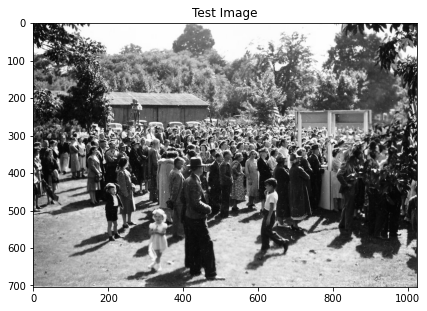

In [ ]:
#Displaing Data from Test_Data
Example_Test_Image = cv2.imread(Example_Test_Path)
imshow('Test Image',Example_Test_Image)

## Analysing the Images
In this section, we will analyse the shape of the image and what they represent.

In [ ]:
print(Example_Reading_Image.shape)
print(Example_Test_Image.shape)

(768, 1024, 3)
(704, 1024, 3)


**Observations**


*   The images are stored in the form of Numpy arrays.
*   The points refer to the various coordinates. The third number i.e 3 represents that the image has three values of Red, Green and Blue respectively.



### Creating Blank Canvas
Now, we will use Numpy's np.zeroes function to create a matrix of zeroes with the dimensions equal to that of the image. This matrix will then be used to plot a blank canvas which will be used later on to create the density plot.

In [ ]:
Example_Testing_Zeros = np.zeros((Example_Test_Image.shape[0], Example_Test_Image.shape[1]), dtype=np.float32)


<Figure size 720x720 with 0 Axes>

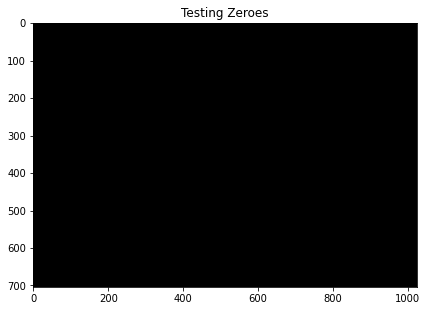

In [ ]:
figure = plt.figure(figsize=(10,10))

imshow('Testing Zeroes', Example_Testing_Zeros)

## Loading Matlab Files from Dataset
**What is a Matlab file?** <br>
Files with the .mat extension are files that are in the binary data container format that the MATLAB program uses.

In [ ]:
# Storing path of GT_IMG_1.mat from Part A train_data ground-truth into a variable called Example_Mat_Path
Example_Mat_Path = '/content/drive/MyDrive/Datasets/part_A/train_data/ground-truth/GT_IMG_1.mat'

In [ ]:
# Storing path of GT_IMG_1.mat from Part A test_data ground-truth into a variable called Example_Testing_Mat
Example_Testing_Mat = "/content/drive/MyDrive/Datasets/part_A/test_data/ground-truth/GT_IMG_1.mat"

### Using loadmat function to read the matlab file

* **scipy.io.loadmat** is a function that reads a MATLAB file.
* It returns dictionary with variable names as keys, and loaded matrices as values.
* By default SciPy reads MATLAB structs as structured NumPy arrays where the dtype fields are of type object and the names correspond to the MATLAB struct field names.

**NOTE:**
The MATLAB file in this dataset contains information/coordinates where humans (or rather just there heads) are located. This will further be used for drawing markers and plotting density maps.

### Loading MAT File from Train_data

In [ ]:
#Loading the MATLAB file from its path into a variable called Example_Load_Mat
Example_Load_Mat = loadmat(Example_Mat_Path)
print(type(Example_Load_Mat)) #Printing the type of the variable Example_Load_Mat

<class 'dict'>


In [ ]:
# Printing the items of the dictionary Example_Load_Mat obtained.
print(Example_Load_Mat.items())

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 18 20:06:05 2016'), ('__version__', '1.0'), ('__globals__', []), ('image_info', array([[array([[(array([[ 29.6225116 , 472.92022152],
                       [ 54.35533603, 454.96602305],
                       [ 51.79045053, 460.46220626],
                       ...,
                       [597.89732076, 688.27900015],
                       [965.77518336, 638.44693908],
                       [166.9965574 , 628.1873971 ]]), array([[1546]], dtype=uint16))]],
              dtype=[('location', 'O'), ('number', 'O')])                               ]],
      dtype=object))])


In [ ]:
# Printing the keys of the dictionary
print(Example_Load_Mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])


**Observations**


*   A dictionary is obtained after loading the MATLAB file using scipy's loadmat function.
*   The dictionary consists of 4 keys namely - __header__, __version__, __globals__ and **image_info**.
* We will make use of image_info items in further implementation.



### Extracting and Analysing image_info from the Dictionary

In [ ]:
# Extracting all the value of image_info key into a variable Example_Image_Info
Example_Image_Info = Example_Load_Mat.get("image_info")
print(type(Example_Image_Info))   # The type of Example_Image_Info is numpy array

<class 'numpy.ndarray'>


In [ ]:
# calculating the shape of Example_Image_Info array
print(Example_Image_Info.shape)

(1, 1)


In [ ]:
# Printing the value stored in Example_Image_Info variable
print(Example_Image_Info)

[[array([[(array([[ 29.6225116 , 472.92022152],
                 [ 54.35533603, 454.96602305],
                 [ 51.79045053, 460.46220626],
                 ...,
                 [597.89732076, 688.27900015],
                 [965.77518336, 638.44693908],
                 [166.9965574 , 628.1873971 ]]), array([[1546]], dtype=uint16))]],
        dtype=[('location', 'O'), ('number', 'O')])                               ]]


In [ ]:
# Extract the only the numerical values from the n-dimensonal array into a variable called Example_Coordinates
Example_Coordinates = Example_Image_Info[0][0][0][0][0]

In [ ]:
# The variable Example_Coordinates contains all the coordinates for the image
print(Example_Coordinates)

[[ 29.6225116  472.92022152]
 [ 54.35533603 454.96602305]
 [ 51.79045053 460.46220626]
 ...
 [597.89732076 688.27900015]
 [965.77518336 638.44693908]
 [166.9965574  628.1873971 ]]


In [ ]:
# Printing the type of the variable Example_Coordinates
print(type(Example_Coordinates)) # The output obtained is a n-dimensional numpy array

<class 'numpy.ndarray'>


In [ ]:
# Printing the shape of Example_Coordinates variable
print(Example_Coordinates.shape) # The shape obtained is (1546, 2) which shows it has 1546 rows and 2 columns

(1546, 2)


### Loading MATLAB file from test_data
Following all the steps as above, we will load the MATLAB file from the test data and create a variable that stores the coordinates for the test image.

In [ ]:
# Loading MATLAB file from the path stored in Example_Testing_Mat and then extracting the value of image_info key
Example_Load_Mat_For_Testing = loadmat(Example_Testing_Mat)["image_info"]

In [ ]:
# Storing the coordinates in a variable called Example_Testing_Coordinates
Example_Testing_Coordinates = Example_Load_Mat_For_Testing[0][0][0][0][0]

In [ ]:
# Printing the top 10 coordinates
print(Example_Testing_Coordinates[0:10])

[[163.48483516 341.77022977]
 [211.56475524 442.02197802]
 [333.29902098 517.72227772]
 [436.6197003  372.45954046]
 [391.60871129 374.50549451]
 [ 45.58673327 346.37362637]
 [ 11.317003   344.32767233]
 [ 15.40891109 325.4025974 ]
 [ 17.96635365 284.48351648]
 [ 45.58673327 288.57542458]]


## Drawing Markers on the Image
In this section, for every coordinate of person obtained in the image, we will draw a marker. The coordinates are present in the Example_coordinates and Example_Testing_Coordinates variables respectively.

We will run a loop through all the coordinates and draw a marker using OpenCV's drawMarker function.

<Figure size 720x720 with 0 Axes>

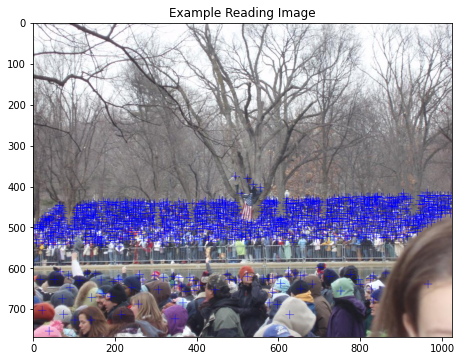

Total Markers 1546


In [ ]:
# Drawing Marker on the Example_Reading_Image using OpenCV's drawMarker function.
figure = plt.figure(figsize=(10,10))

count = 0 # Used to count the total markers. This will be equal to the number of rows in the Example_Coordinates

# Running a loop to visit every coordinate
for e_x_cor, e_y_cor in Example_Coordinates:
    e_x_cor = int(e_x_cor)
    e_y_cor = int(e_y_cor)
    cv2.drawMarker(Example_Reading_Image, (e_x_cor, e_y_cor), (255, 0, 0),thickness=1)
    count += 1

imshow('Example Reading Image',Example_Reading_Image)
print('Total Markers', count)

<Figure size 720x720 with 0 Axes>

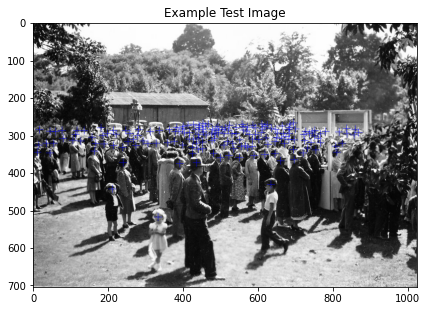

Total Markers 172


In [ ]:
# Drawing Marker on the Example_Reading_Image using OpenCV's drawMarker function.
figure = plt.figure(figsize=(10,10))

count = 0  # Used to count the total markers. This will be equal to the number of rows in the Example_Coordinates

# Running a loop to visit every coordinate
for e_x_cor, e_y_cor in Example_Testing_Coordinates:
    e_x_cor = int(e_x_cor)
    e_y_cor = int(e_y_cor)
    cv2.drawMarker(Example_Test_Image, (e_x_cor, e_y_cor), (255, 0, 0),thickness=1)
    count += 1

imshow('Example Test Image',Example_Test_Image)
print('Total Markers', count)

## Creating the Density Plot for the Image
Now, we have reached an important section of our implementation. This section will create a density plot for our image. In the density plot, as the crowd increases, the intensity of the plot also increases (higher density in other words).

**NOTE:** In our model training, we will instruct the model to predict the density plots for every image. The plots will be then be compared to the original density plots.

### Creating a Black Canvas
The first step for creating a density plot is to construct a canvas upon which the density plot will be constructed.

In [ ]:
# Creating a blank canvas that has shape equal to that of Example_Reading_Image
Example_Zeros = np.zeros((Example_Reading_Image.shape[0], Example_Reading_Image.shape[1]), dtype=np.float32)
figure = plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

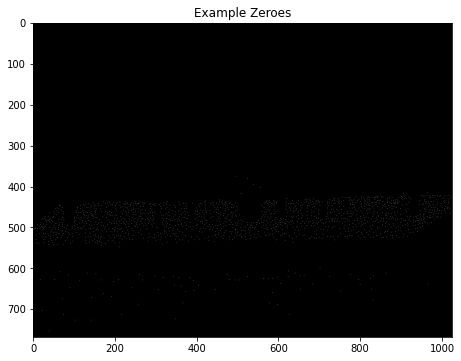

In [ ]:
# For all the coordinates in Example_Coordinates, we will put the value in the numpy array as 1
for x_cor_example, y_cor_example in Example_Coordinates:
    x_cor_example = int(x_cor_example)
    y_cor_example = int(y_cor_example)
    Example_Zeros[y_cor_example, x_cor_example] = 1

figure = plt.figure(figsize=(10,10))
imshow('Example Zeroes',Example_Zeros)

### Creating the Density Plot using gaussian_filter
The Gaussian smoothing operator is a 2-D convolution operator that is used to *blur* images and remove detail and noise. In this sense it is similar to the mean filter, but it uses a different kernel that represents the shape of a Gaussian (bell-shaped) hump. This kernel has some special properties which are detailed below.



*   **Input:** Numpy array, here the input is Example_Zeroes that we created previously.
*   **Sigma:** It is Standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence, or as a single number, in which case it is equal for all axes.
* Returns: Returned array of same shape as input.


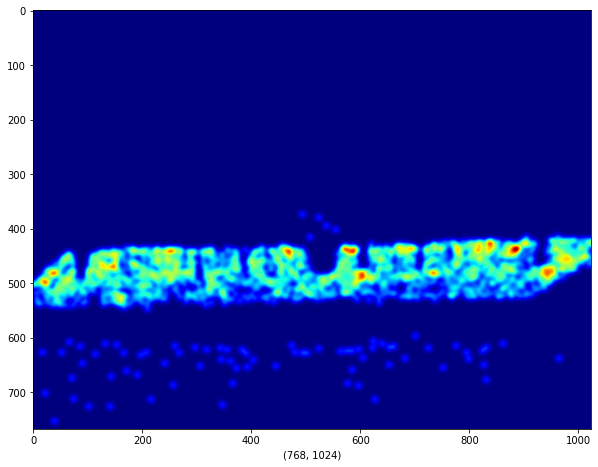

In [ ]:
# Using Guassian Filter, we store the ouput obtained in a variable called Gaussian_Image_Example
Gaussian_Image_Example = gaussian_filter(Example_Zeros,sigma=5,truncate=5*5)

figure = plt.figure(figsize=(10,10))
plt.xlabel(Gaussian_Image_Example.shape)
plt.imshow(Gaussian_Image_Example,cmap="jet") # Showing the plot and using colormap = jet

In [ ]:
# Printing the shape of output.
Gaussian_Image_Example.shape # The shape obtained is equal to that of the reading image

(768, 1024)

In [ ]:
# Calculating the average of the values in the Gaussian_Image_Example
groundtruth = np.asarray(Gaussian_Image_Example)
np.sum(groundtruth) # It is observed it is close to the total number of markers (or rows or people) in the Example_Reading_Image

1544.9998

## Plotting All Graphs Plotted so far
We create a MatPlotLib subplot with three subplots namely Example_Reading_Image, canvas and the Density plot.

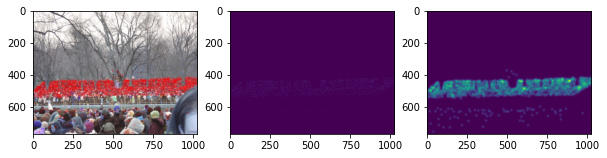

In [ ]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

axis[0].imshow(Example_Reading_Image)
axis[1].imshow(Example_Zeros)
axis[2].imshow(Gaussian_Image_Example)

## Conclusion
* In this notebook, we gained a glimpse into the basics of Image analysis and creating density plots for Crowd Estimation.
* In the next notebook, we will train to our model to create density plot as predictions of the crowd.